# Modelo 01 - 12%

## 1. Pré-processamento das imagens 

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Caminho para a pasta que contém as subpastas das pragas
data_dir = 'data_image'

# Definindo o tamanho das imagens
img_size = (150, 150)  # Redimensionar para 150x150

# Gerador de imagens para carregar as imagens e fazer aumento de dados
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Carregar os dados
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 563 images belonging to 10 classes.
Found 138 images belonging to 10 classes.


## 2. Construção do Modelo

In [4]:
# Definindo o modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')  # Saída para o número de classes
])

# Compilando o modelo
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Resumo do modelo
model.summary()


C:\Users\gustavo.j.siebel\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,642 (18.42 MB)

 Trainable params: 4,829,642 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

## 3. Treinamento do Modelo

In [5]:
# Treinando o modelo
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)


C:\Users\gustavo.j.siebel\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 89s 5s/step - accuracy: 0.3825 - loss: 2.0064 - val_accuracy: 0.7681 - val_loss: 0.6814
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 77s 4s/step - accuracy: 0.7346 - loss: 0.8535 - val_accuracy: 0.8478 - val_loss: 0.5275
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 76s 4s/step - accuracy: 0.8462 - loss: 0.5494 - val_accuracy: 0.8841 - val_loss: 0.4284
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 75s 4s/step - accuracy: 0.8209 - loss: 0.4573 - val_accuracy: 0.8116 - val_loss: 0.4781
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - accuracy: 0.8857 - loss: 0.3785 - val_accuracy: 0.7899 - val_loss: 0.4982
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 67s 4s/step - accuracy: 0.9476 - loss: 0.1944 - val_accuracy: 0.9203 - val_loss: 0.3582
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 65s 4s/step - accuracy: 0.9398 - loss: 0.1569 - val_accuracy: 0.9058 - val_loss: 0.3943
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 66s 4s/step - accuracy: 0.9473 - loss: 0.2069 - val_accuracy: 0.7391 - val_loss:

## 4. Salvando o modelo

In [6]:
# Salvando o modelo
model.save('modelo_pragas_soja.h5')

## 5.Avaliação do Modelo

5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step
Classification Report:
                       precision    recall  f1-score   support

        Mossaic Virus       0.00      0.00      0.00         4
      Southern blight       0.00      0.00      0.00        12
Sudden Death Syndrone       0.19      0.18      0.19        22
        Yellow Mosaic       0.22      0.23      0.22        22
     bacterial_blight       0.06      0.06      0.06        17
           brown_spot       0.06      0.06      0.06        16
          crestamento       1.00      1.00      1.00         1
             ferrugen       0.08      0.08      0.08        13
       powdery_mildew       0.19      0.15      0.17        27
             septoria       0.00      0.00      0.00         4

             accuracy                           0.12       138
            macro avg       0.18      0.18      0.18       138
         weighted avg       0.13      0.12      0.13       138



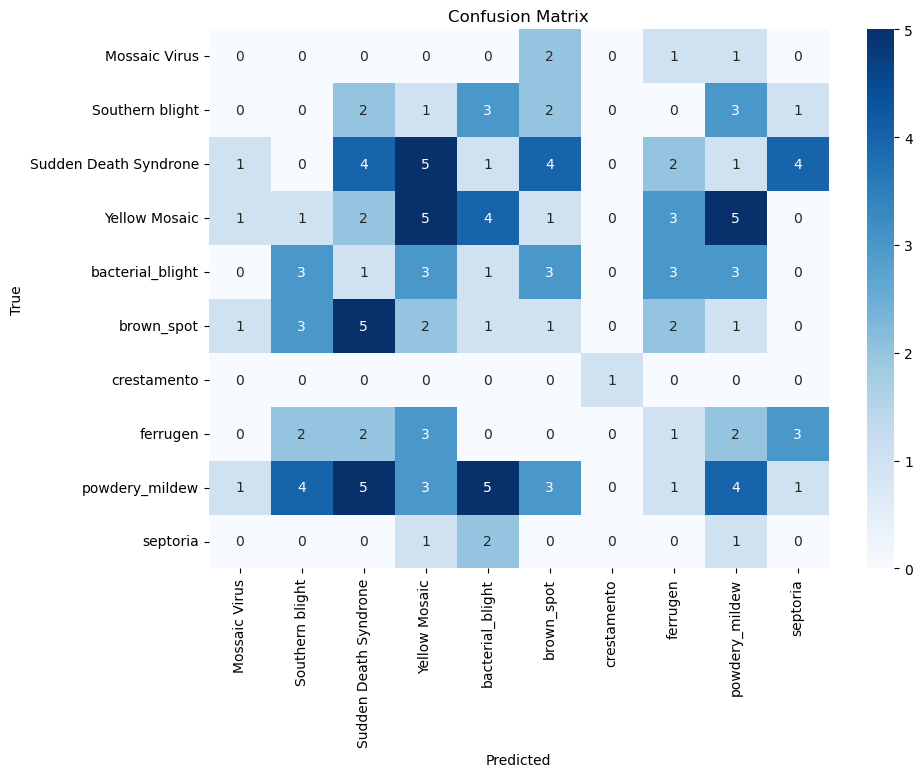

In [7]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Supondo que já tenha o modelo treinado
# Carregar o modelo
model = tf.keras.models.load_model('modelo_pragas_soja.h5')

# Usar o conjunto de validação para avaliação
# Se você já tem um conjunto de teste separado, substitua val_data por esse conjunto

val_data.reset()  # Resetar o gerador de dados para garantir que o modelo faz a avaliação em todas as imagens

# Previsões sobre os dados de validação
y_pred = model.predict(val_data)
y_pred_classes = np.argmax(y_pred, axis=1)  # As previsões serão as classes com maior probabilidade

# Obter as classes reais
y_true = val_data.classes  # As classes verdadeiras

# Métricas de desempenho
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=val_data.class_indices.keys()))

# Matriz de Confusão
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plotando a Matriz de Confusão
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=val_data.class_indices.keys(), yticklabels=val_data.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Modelo 02 - ResNet50

## 1. Importando Libs

In [9]:
# Importando as bibliotecas necessárias
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


## 2.

In [11]:
# Caminho para a pasta que contém as subpastas das pragas
data_dir = 'data_image'

# Definindo o tamanho das imagens
img_size = (150, 150)  # Redimensionar para 150x150

# Aumento de dados
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Carregar os dados
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 563 images belonging to 10 classes.
Found 138 images belonging to 10 classes.


## 3.

In [12]:
# Carregar ResNet50 pré-treinado sem a camada de classificação
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Congelar as camadas do modelo base
base_model.trainable = False

# Construir o modelo final
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')  # Saída para o número de classes
])

# Compilar o modelo
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Resumo do modelo
model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 5, 5, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,851,274 (90.99 MB)

 Trainable params: 263,562 (1.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

## 4.

In [13]:
# Treinando o modelo
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)


C:\Users\gustavo.j.siebel\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 100s 5s/step - accuracy: 0.1153 - loss: 2.4513 - val_accuracy: 0.1594 - val_loss: 2.1081
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 91s 5s/step - accuracy: 0.1650 - loss: 2.1892 - val_accuracy: 0.3478 - val_loss: 2.0591
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 86s 5s/step - accuracy: 0.2095 - loss: 2.0995 - val_accuracy: 0.2609 - val_loss: 2.0340
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 84s 5s/step - accuracy: 0.2806 - loss: 2.0364 - val_accuracy: 0.1957 - val_loss: 2.0089
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - accuracy: 0.2382 - loss: 2.0459 - val_accuracy: 0.3333 - val_loss: 1.9842
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 77s 4s/step - accuracy: 0.2963 - loss: 2.0231 - val_accuracy: 0.2609 - val_loss: 1.9633
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 86s 5s/step - accuracy: 0.2881 - loss: 2.0061 - val_accuracy: 0.3841 - val_loss: 1.9207
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 77s 4s/step - accuracy: 0.3159 - loss: 1.9705 - val_accuracy: 0.2971 - val_loss

## 5.

5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step
Classification Report:
                       precision    recall  f1-score   support

        Mossaic Virus       0.00      0.00      0.00         4
      Southern blight       0.07      0.08      0.07        12
Sudden Death Syndrone       0.19      0.23      0.21        22
        Yellow Mosaic       0.00      0.00      0.00        22
     bacterial_blight       0.00      0.00      0.00        17
           brown_spot       0.00      0.00      0.00        16
          crestamento       0.00      0.00      0.00         1
             ferrugen       0.00      0.00      0.00        13
       powdery_mildew       0.22      0.74      0.34        27
             septoria       0.00      0.00      0.00         4

             accuracy                           0.19       138
            macro avg       0.05      0.11      0.06       138
         weighted avg       0.08      0.19      0.11       138



c:\Users\gustavo.j.siebel\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gustavo.j.siebel\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gustavo.j.siebel\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

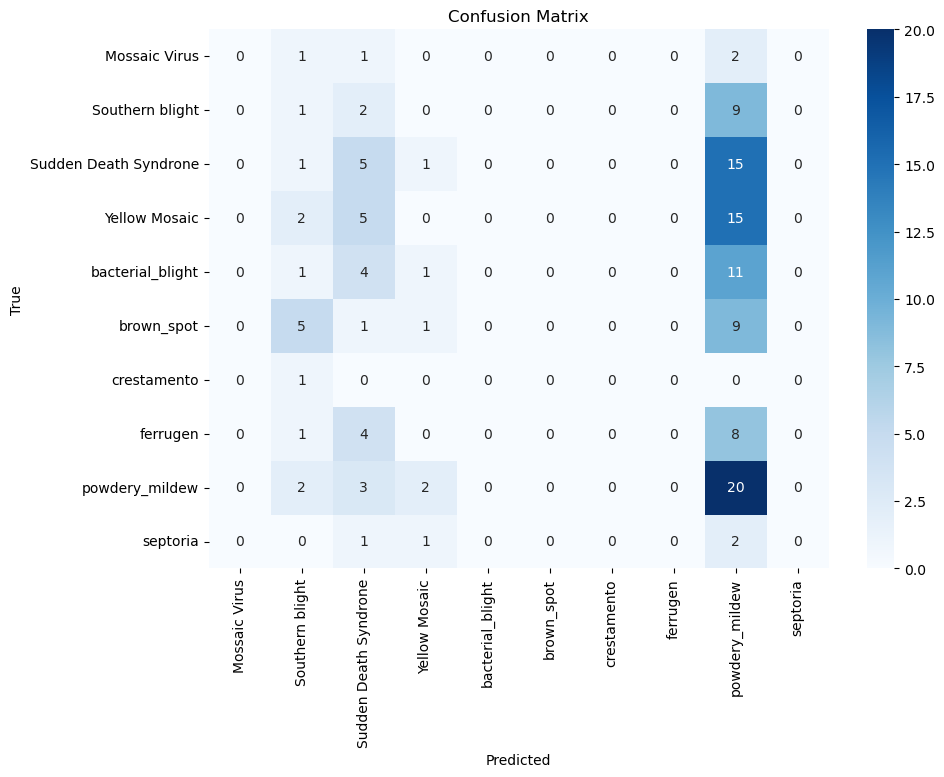

In [14]:
# Resetar o gerador de dados de validação para garantir a avaliação correta
val_data.reset()

# Previsões sobre os dados de validação
y_pred = model.predict(val_data)
y_pred_classes = np.argmax(y_pred, axis=1)  # As previsões serão as classes com maior probabilidade

# Obter as classes reais
y_true = val_data.classes  # As classes verdadeiras

# Métricas de desempenho
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=val_data.class_indices.keys()))

# Matriz de Confusão
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plotando a Matriz de Confusão
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=val_data.class_indices.keys(), yticklabels=val_data.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## 6. 

In [15]:
# Salvando o modelo
model.save('modelo_pragas_soja_resnet50.h5')


# Modelo 03 - ResNet50 V2

In [16]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import class_weight


In [24]:
# Caminho para a pasta que contém as subpastas das pragas
data_dir = 'data_image'

# Definindo o tamanho das imagens
img_size = (150, 150)

# Aumento de dados
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Carregar os dados
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Calculando os pesos das classes para balancear
class_weights = class_weight.compute_class_weight(
    'balanced',  # Definir 'balanced' para calcular os pesos automaticamente
    classes=np.unique(train_data.classes),  # Classes únicas no conjunto de treinamento
    y=train_data.classes  # Classes alvo (rótulos) do conjunto de treinamento
)

# Convertendo os pesos das classes para um dicionário
class_weight_dict = dict(enumerate(class_weights))


Found 563 images belonging to 10 classes.


Found 138 images belonging to 10 classes.


In [25]:
# Carregar ResNet50 pré-treinado sem a camada de classificação
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Congelar as primeiras camadas do modelo
for layer in base_model.layers:
    layer.trainable = False

# Construir o modelo final com camadas adicionais
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')  # Saída para o número de classes
])

# Compilação do modelo
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Resumo do modelo
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 5, 5, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,851,274 (90.99 MB)

 Trainable params: 263,562 (1.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [26]:
# Descongelar as últimas camadas da ResNet50 para ajuste fino
for layer in base_model.layers[-10:]:  # Descongelar as últimas 10 camadas
    layer.trainable = True

# Recompilar o modelo após liberar mais camadas
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Resumo do modelo com as camadas descongeladas
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 5, 5, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,851,274 (90.99 MB)

 Trainable params: 4,729,226 (18.04 MB)

 Non-trainable params: 19,122,048 (72.94 MB)

In [27]:
# Treinando o modelo com class_weight para balancear as classes
history = model.fit(
    train_data,
    epochs=20,  # Aumentando o número de épocas
    validation_data=val_data,
    class_weight=class_weight_dict  # Balanceando as classes
)


C:\Users\gustavo.j.siebel\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was (tf.float32, tf.float32, tf.float32), but the yielded element was (array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]]],


       [[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]]],


       [[[0.73333335, 0.77647066, 0.80392164],
         [0.73333335, 0.77647066, 0.80392164],
         [0.73333335, 0.77647066, 0.80392164],
         ...,
         [0.69021565, 0.73333335, 0.7607844 ],
         [0.6923257 , 0.73333335, 0.7607844 ],
         [0.69411767, 0.73333335, 0.7607844 ]],

        [[0.73333335, 0.77647066, 0.80392164],
         [0.73333335, 0.77647066, 0.80392164],
         [0.73333335, 0.77647066, 0.80392164],
         ...,
         [0.6934893 , 0.73333335, 0.7607844 ],
         [0.69411767, 0.73333335, 0.7607844 ],
         [0.69411767, 0.73333335, 0.7607844 ]],

        [[0.73333335, 0.77647066, 0.80392164],
         [0.73333335, 0.77647066, 0.80392164],
         [0.73333335, 0.77647066, 0.80392164],
         ...,
         [0.69411767, 0.73333335, 0.7607844 ],
         [0.69411767, 0.7324996 , 0.7607844 ],
         [0.69411767, 0.7303896 , 0.7607844 ]],

        ...,

        [[0.6901961 , 0.7308841 , 0.7607844 ],
         [0.69083387, 0.7294118 , 0.7607844 ],
         [0.6929439 , 0.7294118 , 0.7607844 ],
         ...,
         [0.73333335, 0.77647066, 0.80392164],
         [0.73333335, 0.77647066, 0.80392164],
         [0.73333335, 0.77647066, 0.80392164]],

        [[0.69199747, 0.7294118 , 0.7607844 ],
         [0.69410753, 0.7294118 , 0.7607844 ],
         [0.69201785, 0.7294118 , 0.7607844 ],
         ...,
         [0.73333335, 0.77647066, 0.80392164],
         [0.73333335, 0.77647066, 0.80392164],
         [0.73333335, 0.77647066, 0.80392164]],

        [[0.6929642 , 0.7294118 , 0.7607844 ],
         [0.6908542 , 0.7294118 , 0.7607844 ],
         [0.6901961 , 0.7308638 , 0.7607844 ],
         ...,
         [0.73333335, 0.77647066, 0.80392164],
         [0.73333335, 0.77647066, 0.80392164],
         [0.73333335, 0.77647066, 0.80392164]]],


       ...,


       [[[0.73333335, 0.8000001 , 0.35176706],
         [0.73333335, 0.8000001 , 0.35033894],
         [0.7326807 , 0.7995649 , 0.34945476],
         ...,
         [0.8082019 , 0.8335128 , 0.20230113],
         [0.79628646, 0.827555  , 0.28868815],
         [0.763883  , 0.81867045, 0.36336768]],

        [[0.7304567 , 0.7971234 , 0.34718782],
         [0.73188484, 0.7985515 , 0.35004404],
         [0.7333129 , 0.79997957, 0.35290024],
         ...,
         [0.80042994, 0.82962674, 0.25864813],
         [0.77527744, 0.82177806, 0.33747113],
         [0.6979402 , 0.77870286, 0.3578899 ]],

        [[0.74744755, 0.8081023 , 0.35110995],
         [0.7388789 , 0.80238986, 0.34825376],
         [0.73031026, 0.7966775 , 0.34539756],
         ...,
         [0.78667194, 0.82488567, 0.31157455],
         [0.75390446, 0.815949  , 0.38604614],
         [0.58524615, 0.70292586, 0.29571387]],

        ...,

        [[0.57250667, 0.6573058 , 0.31604457],
         [0.5880185 , 0.64128494, 0.32796   ],
         [0.60589164, 0.63234836, 0.3398755 ],
         ...,
         [0.5922645 , 0.6861132 , 0.35680896],
         [0.60040283, 0.6890232 , 0.3761032 ],
         [0.6089714 , 0.6918794 , 0.39609668]],

        [[0.5822217 , 0.64564776, 0.32381657],
         [0.5996765 , 0.63545597, 0.33573204],
         [0.60622543, 0.641079  , 0.3427942 ],
         ...,
         [0.59963393, 0.67359453, 0.35092756],
         [0.5975099 , 0.678245  , 0.35418627],
         [0.5946537 , 0.68252933, 0.35561436]],

        [[0.59346133, 0.6385636 , 0.3315886 ],
         [0.6072613 , 0.6348639 , 0.3417584 ],
         [0.60428244, 0.652737  , 0.34473723],
         ...,
         [0.5902829 , 0.653028  , 0.30761766],
         [0.5943884 , 0.6604809 , 0.3220775 ],
         [0.5972447 , 0.66762143, 0.33778667]]],


       [[[0.42192408, 0.54769206, 0.39530638],
         [0.43337965, 0.54892707, 0.38814273],
         [0.47642082, 0.5679462 , 0.42886764],
         ...,
         [0.45611447, 0.6411767 , 0.6182265 ],
         [0.4846517 , 0.61708903, 0.61594886],
         [0.48603463, 0.62041354, 0.6286655 ]],

        [[0.41287437, 0.54266447, 0.39832297],
         [0.43237412, 0.5509381 , 0.3901538 ],
         [0.44022205, 0.5478358 , 0.3896523 ],
         ...,
         [0.4317845 , 0.58719355, 0.5689844 ],
         [0.46654776, 0.5507065 , 0.5693467 ],
         [0.5134422 , 0.6491691 , 0.6517355 ]],

        [[0.4038247 , 0.5376368 , 0.4013395 ],
         [0.43133682, 0.55292135, 0.3921688 ],
         [0.4344255 , 0.54683536, 0.386051  ],
         ...,
         [0.4326417 , 0.5220053 , 0.5457676 ],
         [0.514301  , 0.60936683, 0.63216925],
         [0.5719036 , 0.72164255, 0.71229345]],

        ...,

        [[0.60534495, 0.6392157 , 0.25264585],
         [0.6163288 , 0.6196988 , 0.25861743],
         [0.6262022 , 0.59698987, 0.2675036 ],
         ...,
         [0.2906426 , 0.26968816, 0.27637511],
         [0.30213916, 0.26853725, 0.28065172],
         [0.25800282, 0.22561732, 0.24343443]],

        [[0.63791776, 0.57004416, 0.27804756],
         [0.644056  , 0.54836047, 0.28539565],
         [0.60357475, 0.53947437, 0.27354747],
         ...,
         [0.31987762, 0.26886293, 0.26544797],
         [0.31143194, 0.25148535, 0.25777617],
         [0.27379546, 0.23048477, 0.2429266 ]],

        [[0.5555411 , 0.5289304 , 0.25948885],
         [0.5150598 , 0.52004427, 0.24764065],
         [0.48370713, 0.50973177, 0.23664829],
         ...,
         [0.39389026, 0.30907106, 0.3074277 ],
         [0.43573114, 0.33168113, 0.33824506],
         [0.36646384, 0.2901048 , 0.29001942]]],


       [[[0.5970754 , 0.66139853, 0.1599598 ],
         [0.5897714 , 0.66470385, 0.1511781 ],
         [0.53781706, 0.6188547 , 0.16411819],
         ...,
         [0.58852506, 0.68687344, 0.28626487],
         [0.5038659 , 0.62714726, 0.21784742],
         [0.33848488, 0.45088437, 0.09811234]],

        [[0.63944954, 0.6930501 , 0.14989877],
         [0.7279507 , 0.7646537 , 0.17228554],
         [0.54331523, 0.6375435 , 0.1359906 ],
         ...,
         [0.56564736, 0.67829424, 0.26767668],
         [0.42379385, 0.54278564, 0.15350382],
         [0.4085479 , 0.5137982 , 0.2253697 ]],

        [[0.5358081 , 0.6142094 , 0.13582008],
         [0.7006862 , 0.7279941 , 0.16579358],
         [0.7132812 , 0.7388707 , 0.16255821],
         ...,
         [0.53694856, 0.6620022 , 0.24443167],
         [0.3437218 , 0.45842397, 0.0891602 ],
         [0.47861093, 0.5767119 , 0.35262707]],

        ...,

        [[0.36266756, 0.52788305, 0.25115764],
         [0.35599756, 0.51939154, 0.24096018],
         [0.37489304, 0.5304824 , 0.24186388],
         ...,
         [0.42153284, 0.5391799 , 0.25572127],
         [0.43426082, 0.54702353, 0.24868694],
         [0.4575762 , 0.5625672 , 0.25127754]],

        [[0.3512287 , 0.5193039 , 0.24114867],
         [0.36171702, 0.52082145, 0.24239004],
         [0.3863319 , 0.5404914 , 0.24043402],
         ...,
         [0.43179303, 0.5462891 , 0.31764707],
         [0.4315134 , 0.5491604 , 0.3006337 ],
         [0.4263322 , 0.5439793 , 0.27731833]],

        [[0.3536345 , 0.51880085, 0.24036942],
         [0.37016693, 0.52634704, 0.24245463],
         [0.39438614, 0.54796195, 0.23752338],
         ...,
         [0.3930128 , 0.47558472, 0.3154573 ],
         [0.40684167, 0.49888152, 0.31764707],
         [0.41979468, 0.5234922 , 0.31764707]]]], dtype=float32), array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)).
Traceback (most recent call last):

  File "C:\Users\gustavo.j.siebel\AppData\Roaming\Python\Python312\site-packages\tensorflow\python\data\ops\from_generator_op.py", line 204, in generator_py_func
    flattened_values = nest.flatten_up_to(output_types, values)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\gustavo.j.siebel\AppData\Roaming\Python\Python312\site-packages\tensorflow\python\data\util\nest.py", line 237, in flatten_up_to
    return nest_util.flatten_up_to(
           ^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\gustavo.j.siebel\AppData\Roaming\Python\Python312\site-packages\tensorflow\python\util\nest_util.py", line 1541, in flatten_up_to
    return _tf_data_flatten_up_to(shallow_tree, input_tree)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\gustavo.j.siebel\AppData\Roaming\Python\Python312\site-packages\tensorflow\python\util\nest_util.py", line 1570, in _tf_data_flatten_up_to
    _tf_data_assert_shallow_structure(shallow_tree, input_tree)

  File "C:\Users\gustavo.j.siebel\AppData\Roaming\Python\Python312\site-packages\tensorflow\python\util\nest_util.py", line 1427, in _tf_data_assert_shallow_structure
    raise ValueError(

ValueError: The two structures don't have the same sequence length. Input structure has length 2, while shallow structure has length 3.


The above exception was the direct cause of the following exception:


Traceback (most recent call last):

  File "C:\Users\gustavo.j.siebel\AppData\Roaming\Python\Python312\site-packages\tensorflow\python\ops\script_ops.py", line 269, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "C:\Users\gustavo.j.siebel\AppData\Roaming\Python\Python312\site-packages\tensorflow\python\autograph\impl\api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\gustavo.j.siebel\AppData\Roaming\Python\Python312\site-packages\tensorflow\python\data\ops\from_generator_op.py", line 206, in generator_py_func
    raise TypeError(

TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was (tf.float32, tf.float32, tf.float32), but the yielded element was (array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]]],


       [[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]]],


       [[[0.73333335, 0.77647066, 0.80392164],
         [0.73333335, 0.77647066, 0.80392164],
         [0.73333335, 0.77647066, 0.80392164],
         ...,
         [0.69021565, 0.73333335, 0.7607844 ],
         [0.6923257 , 0.73333335, 0.7607844 ],
         [0.69411767, 0.73333335, 0.7607844 ]],

        [[0.73333335, 0.77647066, 0.80392164],
         [0.73333335, 0.77647066, 0.80392164],
         [0.73333335, 0.77647066, 0.80392164],
         ...,
         [0.6934893 , 0.73333335, 0.7607844 ],
         [0.69411767, 0.73333335, 0.7607844 ],
         [0.69411767, 0.73333335, 0.7607844 ]],

        [[0.73333335, 0.77647066, 0.80392164],
         [0.73333335, 0.77647066, 0.80392164],
         [0.73333335, 0.77647066, 0.80392164],
         ...,
         [0.69411767, 0.73333335, 0.7607844 ],
         [0.69411767, 0.7324996 , 0.7607844 ],
         [0.69411767, 0.7303896 , 0.7607844 ]],

        ...,

        [[0.6901961 , 0.7308841 , 0.7607844 ],
         [0.69083387, 0.7294118 , 0.7607844 ],
         [0.6929439 , 0.7294118 , 0.7607844 ],
         ...,
         [0.73333335, 0.77647066, 0.80392164],
         [0.73333335, 0.77647066, 0.80392164],
         [0.73333335, 0.77647066, 0.80392164]],

        [[0.69199747, 0.7294118 , 0.7607844 ],
         [0.69410753, 0.7294118 , 0.7607844 ],
         [0.69201785, 0.7294118 , 0.7607844 ],
         ...,
         [0.73333335, 0.77647066, 0.80392164],
         [0.73333335, 0.77647066, 0.80392164],
         [0.73333335, 0.77647066, 0.80392164]],

        [[0.6929642 , 0.7294118 , 0.7607844 ],
         [0.6908542 , 0.7294118 , 0.7607844 ],
         [0.6901961 , 0.7308638 , 0.7607844 ],
         ...,
         [0.73333335, 0.77647066, 0.80392164],
         [0.73333335, 0.77647066, 0.80392164],
         [0.73333335, 0.77647066, 0.80392164]]],


       ...,


       [[[0.73333335, 0.8000001 , 0.35176706],
         [0.73333335, 0.8000001 , 0.35033894],
         [0.7326807 , 0.7995649 , 0.34945476],
         ...,
         [0.8082019 , 0.8335128 , 0.20230113],
         [0.79628646, 0.827555  , 0.28868815],
         [0.763883  , 0.81867045, 0.36336768]],

        [[0.7304567 , 0.7971234 , 0.34718782],
         [0.73188484, 0.7985515 , 0.35004404],
         [0.7333129 , 0.79997957, 0.35290024],
         ...,
         [0.80042994, 0.82962674, 0.25864813],
         [0.77527744, 0.82177806, 0.33747113],
         [0.6979402 , 0.77870286, 0.3578899 ]],

        [[0.74744755, 0.8081023 , 0.35110995],
         [0.7388789 , 0.80238986, 0.34825376],
         [0.73031026, 0.7966775 , 0.34539756],
         ...,
         [0.78667194, 0.82488567, 0.31157455],
         [0.75390446, 0.815949  , 0.38604614],
         [0.58524615, 0.70292586, 0.29571387]],

        ...,

        [[0.57250667, 0.6573058 , 0.31604457],
         [0.5880185 , 0.64128494, 0.32796   ],
         [0.60589164, 0.63234836, 0.3398755 ],
         ...,
         [0.5922645 , 0.6861132 , 0.35680896],
         [0.60040283, 0.6890232 , 0.3761032 ],
         [0.6089714 , 0.6918794 , 0.39609668]],

        [[0.5822217 , 0.64564776, 0.32381657],
         [0.5996765 , 0.63545597, 0.33573204],
         [0.60622543, 0.641079  , 0.3427942 ],
         ...,
         [0.59963393, 0.67359453, 0.35092756],
         [0.5975099 , 0.678245  , 0.35418627],
         [0.5946537 , 0.68252933, 0.35561436]],

        [[0.59346133, 0.6385636 , 0.3315886 ],
         [0.6072613 , 0.6348639 , 0.3417584 ],
         [0.60428244, 0.652737  , 0.34473723],
         ...,
         [0.5902829 , 0.653028  , 0.30761766],
         [0.5943884 , 0.6604809 , 0.3220775 ],
         [0.5972447 , 0.66762143, 0.33778667]]],


       [[[0.42192408, 0.54769206, 0.39530638],
         [0.43337965, 0.54892707, 0.38814273],
         [0.47642082, 0.5679462 , 0.42886764],
         ...,
         [0.45611447, 0.6411767 , 0.6182265 ],
         [0.4846517 , 0.61708903, 0.61594886],
         [0.48603463, 0.62041354, 0.6286655 ]],

        [[0.41287437, 0.54266447, 0.39832297],
         [0.43237412, 0.5509381 , 0.3901538 ],
         [0.44022205, 0.5478358 , 0.3896523 ],
         ...,
         [0.4317845 , 0.58719355, 0.5689844 ],
         [0.46654776, 0.5507065 , 0.5693467 ],
         [0.5134422 , 0.6491691 , 0.6517355 ]],

        [[0.4038247 , 0.5376368 , 0.4013395 ],
         [0.43133682, 0.55292135, 0.3921688 ],
         [0.4344255 , 0.54683536, 0.386051  ],
         ...,
         [0.4326417 , 0.5220053 , 0.5457676 ],
         [0.514301  , 0.60936683, 0.63216925],
         [0.5719036 , 0.72164255, 0.71229345]],

        ...,

        [[0.60534495, 0.6392157 , 0.25264585],
         [0.6163288 , 0.6196988 , 0.25861743],
         [0.6262022 , 0.59698987, 0.2675036 ],
         ...,
         [0.2906426 , 0.26968816, 0.27637511],
         [0.30213916, 0.26853725, 0.28065172],
         [0.25800282, 0.22561732, 0.24343443]],

        [[0.63791776, 0.57004416, 0.27804756],
         [0.644056  , 0.54836047, 0.28539565],
         [0.60357475, 0.53947437, 0.27354747],
         ...,
         [0.31987762, 0.26886293, 0.26544797],
         [0.31143194, 0.25148535, 0.25777617],
         [0.27379546, 0.23048477, 0.2429266 ]],

        [[0.5555411 , 0.5289304 , 0.25948885],
         [0.5150598 , 0.52004427, 0.24764065],
         [0.48370713, 0.50973177, 0.23664829],
         ...,
         [0.39389026, 0.30907106, 0.3074277 ],
         [0.43573114, 0.33168113, 0.33824506],
         [0.36646384, 0.2901048 , 0.29001942]]],


       [[[0.5970754 , 0.66139853, 0.1599598 ],
         [0.5897714 , 0.66470385, 0.1511781 ],
         [0.53781706, 0.6188547 , 0.16411819],
         ...,
         [0.58852506, 0.68687344, 0.28626487],
         [0.5038659 , 0.62714726, 0.21784742],
         [0.33848488, 0.45088437, 0.09811234]],

        [[0.63944954, 0.6930501 , 0.14989877],
         [0.7279507 , 0.7646537 , 0.17228554],
         [0.54331523, 0.6375435 , 0.1359906 ],
         ...,
         [0.56564736, 0.67829424, 0.26767668],
         [0.42379385, 0.54278564, 0.15350382],
         [0.4085479 , 0.5137982 , 0.2253697 ]],

        [[0.5358081 , 0.6142094 , 0.13582008],
         [0.7006862 , 0.7279941 , 0.16579358],
         [0.7132812 , 0.7388707 , 0.16255821],
         ...,
         [0.53694856, 0.6620022 , 0.24443167],
         [0.3437218 , 0.45842397, 0.0891602 ],
         [0.47861093, 0.5767119 , 0.35262707]],

        ...,

        [[0.36266756, 0.52788305, 0.25115764],
         [0.35599756, 0.51939154, 0.24096018],
         [0.37489304, 0.5304824 , 0.24186388],
         ...,
         [0.42153284, 0.5391799 , 0.25572127],
         [0.43426082, 0.54702353, 0.24868694],
         [0.4575762 , 0.5625672 , 0.25127754]],

        [[0.3512287 , 0.5193039 , 0.24114867],
         [0.36171702, 0.52082145, 0.24239004],
         [0.3863319 , 0.5404914 , 0.24043402],
         ...,
         [0.43179303, 0.5462891 , 0.31764707],
         [0.4315134 , 0.5491604 , 0.3006337 ],
         [0.4263322 , 0.5439793 , 0.27731833]],

        [[0.3536345 , 0.51880085, 0.24036942],
         [0.37016693, 0.52634704, 0.24245463],
         [0.39438614, 0.54796195, 0.23752338],
         ...,
         [0.3930128 , 0.47558472, 0.3154573 ],
         [0.40684167, 0.49888152, 0.31764707],
         [0.41979468, 0.5234922 , 0.31764707]]]], dtype=float32), array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)).


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_multi_step_on_iterator_55750]

In [ ]:
# Resetar o gerador de dados de validação para garantir a avaliação correta
val_data.reset()

# Previsões sobre os dados de validação
y_pred = model.predict(val_data)
y_pred_classes = np.argmax(y_pred, axis=1)  # As previsões serão as classes com maior probabilidade

# Obter as classes reais
y_true = val_data.classes  # As classes verdadeiras

# Métricas de desempenho
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=val_data.class_indices.keys()))

# Matriz de Confusão
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plotando a Matriz de Confusão
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=val_data.class_indices.keys(), yticklabels=val_data.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Salvando o modelo
model.save('modelo_pragas_soja_resnet50_v2.h5')


## Aliviando o modelo

In [ ]:
import tensorflow as tf

# Carrega o modelo original em .h5
modelo_keras = tf.keras.models.load_model("modelo_soja.h5")

# Converte o modelo para TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(modelo_keras)
tflite_model = converter.convert()

# Salva o modelo convertido em disco
with open("modelo_soja.tflite", "wb") as f:
    f.write(tflite_model)

print("Conversão concluída com sucesso! Modelo salvo como modelo_soja.tflite")


In [31]:
import tensorflow as tf
import time

# Marca o tempo inicial
start = time.time()

# Carrega o modelo TFLite
interpreter = tf.lite.Interpreter(model_path="modelo_soja.tflite")
interpreter.allocate_tensors()

# Marca o tempo final
end = time.time()

print(f"✅ Modelo carregado com sucesso em {end - start:.2f} segundos!")


✅ Modelo carregado com sucesso em 0.15 segundos!


In [32]:
import numpy as np
from PIL import Image

# Abre e prepara a imagem (substitua "exemplo.jpg" pela sua imagem)
img = Image.open("Mosaic Virus.jpg").resize((224, 224))  # ajuste o tamanho conforme necessário
img_array = np.expand_dims(np.array(img) / 255.0, axis=0).astype(np.float32)

# Pega os detalhes de input e output do modelo
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Envia imagem pro modelo
interpreter.set_tensor(input_details[0]['index'], img_array)
interpreter.invoke()

# Obtém o resultado
prediction = interpreter.get_tensor(output_details[0]['index'])
print("Resultado da inferência:", prediction)


Resultado da inferência: [[2.8554597e-01 6.9026822e-01 1.5648501e-03 2.8209900e-03 1.4005203e-03
  1.1161834e-02 3.1757119e-04 1.3183575e-03 4.4936826e-03 1.1080740e-03]]
